# ✨🌍 **Classification des ordures** 🌍✨

## 🧑‍🤝‍🧑 Membres du groupe

1. 👤 FATOU MBOUP
2. 👤 FATOU KINÉ NDIAYE
3. 👤 BINTOU TENNING NGOM

## 📄✨ Description du projet

Ce projet a pour objectif de classifier les ordures en différentes catégories telles que plastique, papier, métal, déchets, verre, et carton. Nous essaierons de développer un modèle de classification précis et efficace.

## 📂🔗 **Montage de Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Dic3_MLOPS_Project/MLOPS_Project

/content/drive/MyDrive/Dic3_MLOPS_Project/MLOPS_Project


In [3]:
pwd

'/content/drive/MyDrive/Dic3_MLOPS_Project/MLOPS_Project'

## 📦✨ Installation des Bibliothèques pour Colab

In [4]:
#For colab
!pip install pyngrok

#For Colab
!pip install pendulum
#For Colab
!pip install ydata_profiling
!pip install mlflow
#For Colab
!pip install loguru


## 📥🔧 Importation des Modules

In [5]:
# Magics
%reload_ext autoreload
%autoreload 2

# Importations de bibliothèques Python
import cv2
import matplotlib.pyplot as plt
import mlflow
import numpy as np
import os
import pandas as pd
import pendulum
import random
import sys
import tensorflow as tf
from collections import Counter
from datetime import datetime
from loguru import logger
from pathlib import Path
from pyngrok import ngrok
from sklearn.metrics import accuracy_score, auc, log_loss, precision_score, recall_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, label_binarize, LabelEncoder
from sklearn.utils import shuffle
from tensorflow.keras.applications import MobileNetV2, VGG16, DenseNet121
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy, AUC, Precision, Recall, SparseCategoricalAccuracy
from tensorflow.keras.models import Model, save_model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from torch.utils.data import DataLoader, TensorDataset
from torchvision import models
from tqdm import tqdm

# Importations de mlflow
import mlflow.keras
from mlflow import log_artifacts, log_metric, log_param
from mlflow.models import infer_signature
from mlflow.tracking import MlflowClient

# Importations des modules personnalisés
from settings.config import *
from src.make_dataset import *
from src.make_model_mobilenet import *
from src.make_model_vgg16 import *
from src.make_model_densenet import *

# Importations de PyTorch
import torch
import torch.nn as nn
import torch.optim as optim


## 📊📖 Chargement et Prétraitement des données

### 🔗✨ Settings ✨🔗

In [6]:
# Set logging format
log_fmt = "<green>{time:YYYY-MM-DD HH:mm:ss.SSS!UTC}</green> | <level>{level: <8}</level> | <cyan>{name}</cyan>:<cyan>{function}</cyan>:<cyan>{line}</cyan> - {message}"
logger.configure(handlers=[{"sink": sys.stderr, "format": log_fmt}])

# current data
CURRENT_DATE = pendulum.now(tz="UTC")

# directories
PROJECT_DIR = Path.cwd().parent
REPORTS_DIR = Path(PROJECT_DIR, "reports")

logger.info(f"\nProject directory: {PROJECT_DIR} \nReports dir: {REPORTS_DIR}")

2024-08-07 03:53:30.657 | INFO     | __main__:<cell line: 12>:12 - 
Project directory: /content/drive/MyDrive/Dic3_MLOPS_Project 
Reports dir: /content/drive/MyDrive/Dic3_MLOPS_Project/reports


### 🔋✨ Load Data ✨🔋

In [7]:
base_dir = 'Garbage_classification'

In [8]:
imgs_data,labels_data, class_names = load_data(base_dir)

Loading metal: 100%|██████████| 410/410 [00:04<00:00, 97.34it/s] 


In [9]:
class_names

['cardboard', 'glass', 'plastic', 'trash', 'paper', 'metal']

📸✨ Visualization & Preprocessing ✨📸

### 📖✨ Visualization ✨📖

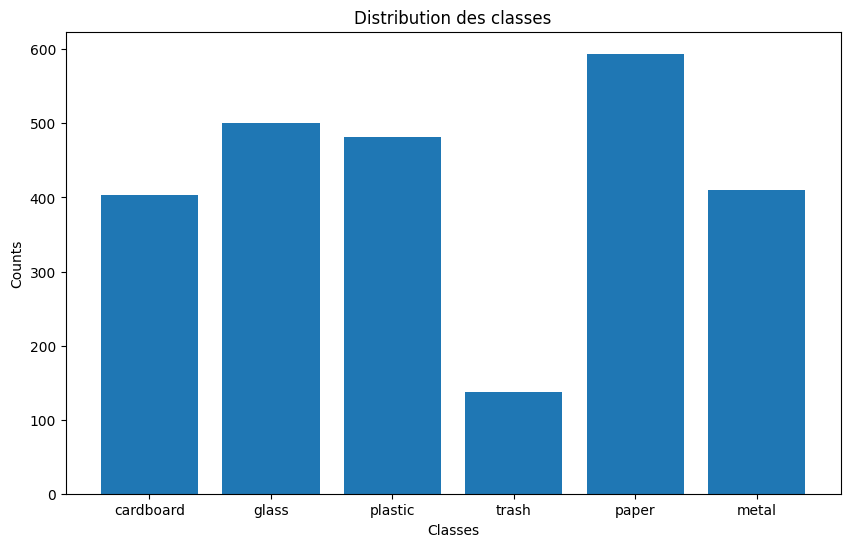

In [10]:
visualize_class_distribution(labels_data, class_names)

Images de: cardboard


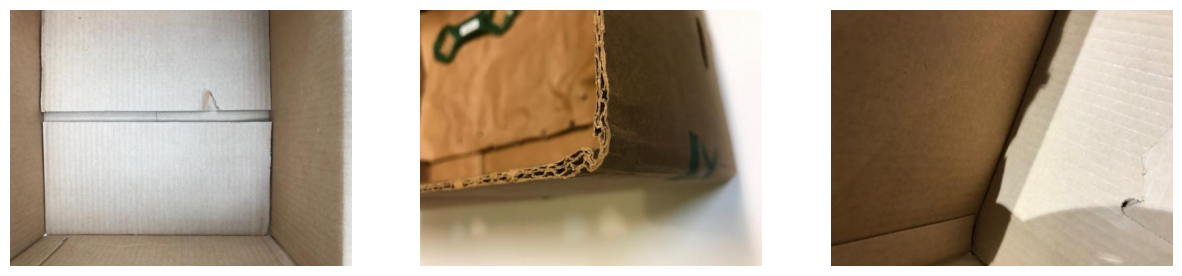

Images de: glass


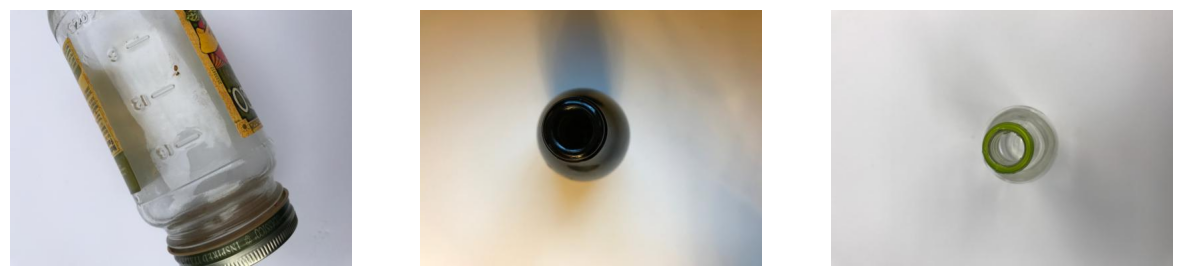

Images de: plastic


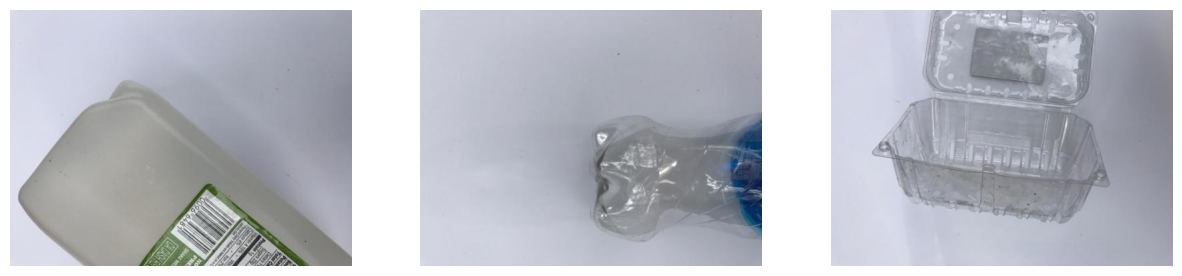

Images de: trash


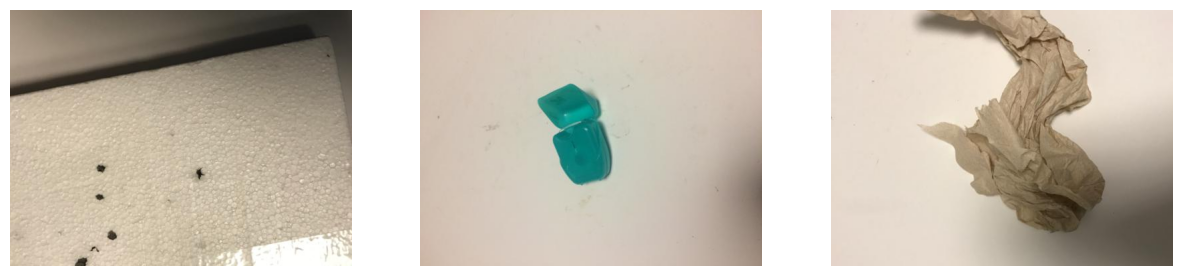

Images de: paper


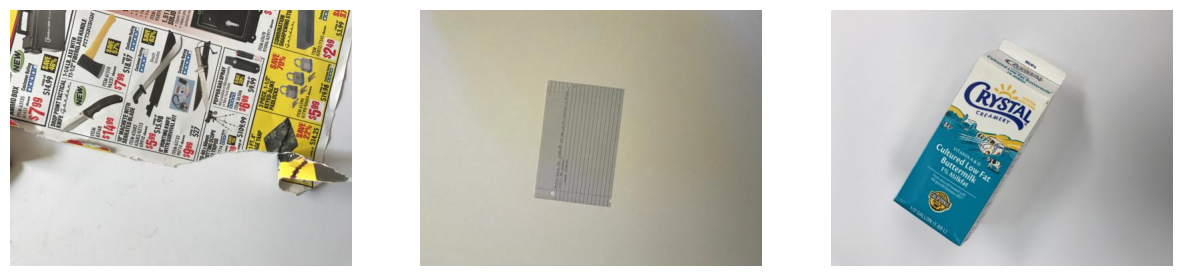

Images de: metal


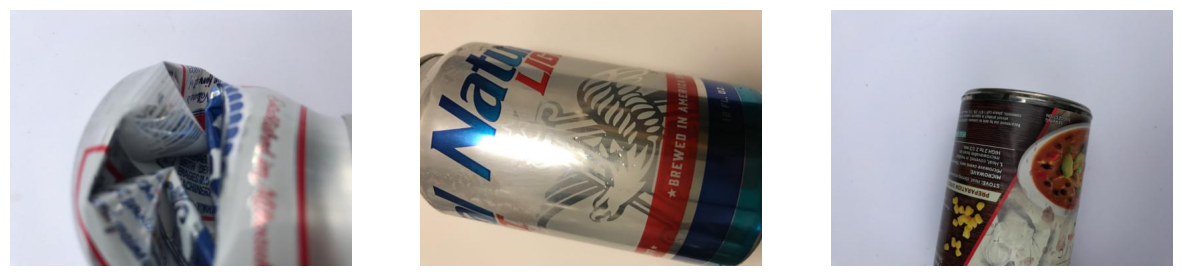

In [11]:
plot_images_from_subfolders(base_dir)

In [12]:
img_dimensions(base_dir)

Analyse des images en: Garbage_classification/cardboard
Dimensions les plus courantes:
Dimension (hauteur x largeur): (384, 512), Fréquence: 403


Analyse des images en: Garbage_classification/glass
Dimensions les plus courantes:
Dimension (hauteur x largeur): (384, 512), Fréquence: 501


Analyse des images en: Garbage_classification/plastic
Dimensions les plus courantes:
Dimension (hauteur x largeur): (384, 512), Fréquence: 482


Analyse des images en: Garbage_classification/trash
Dimensions les plus courantes:
Dimension (hauteur x largeur): (384, 512), Fréquence: 137


Analyse des images en: Garbage_classification/paper
Dimensions les plus courantes:
Dimension (hauteur x largeur): (384, 512), Fréquence: 594


Analyse des images en: Garbage_classification/metal
Dimensions les plus courantes:
Dimension (hauteur x largeur): (384, 512), Fréquence: 410




### 📊✨ Normalization & Encoding ✨📊

In [13]:
processed_dir = "/content/drive/MyDrive/Dic3_MLOPS_Project/processed_images"
data, labels = process_dataset(base_dir, processed_dir)

Classe cardboard : 403 processed
Classe glass : 501 processed
Classe metal : 410 processed
Classe paper : 594 processed
Classe plastic : 482 processed
Classe trash : 137 processed


In [14]:
img_dimensions(processed_dir)

Analyse des images en: /content/drive/MyDrive/Dic3_MLOPS_Project/processed_images/cardboard
Dimensions les plus courantes:
Dimension (hauteur x largeur): (128, 128), Fréquence: 403


Analyse des images en: /content/drive/MyDrive/Dic3_MLOPS_Project/processed_images/glass
Dimensions les plus courantes:
Dimension (hauteur x largeur): (128, 128), Fréquence: 501


Analyse des images en: /content/drive/MyDrive/Dic3_MLOPS_Project/processed_images/metal
Dimensions les plus courantes:
Dimension (hauteur x largeur): (128, 128), Fréquence: 410


Analyse des images en: /content/drive/MyDrive/Dic3_MLOPS_Project/processed_images/paper
Dimensions les plus courantes:
Dimension (hauteur x largeur): (128, 128), Fréquence: 594


Analyse des images en: /content/drive/MyDrive/Dic3_MLOPS_Project/processed_images/plastic
Dimensions les plus courantes:
Dimension (hauteur x largeur): (128, 128), Fréquence: 482


Analyse des images en: /content/drive/MyDrive/Dic3_MLOPS_Project/processed_images/trash
Dimensions 

In [15]:
plot_images_from_subfolders(processed_dir)

Output hidden; open in https://colab.research.google.com to view.

In [16]:
# Convertit la liste data en un tableau NumPy.
# Spécifie le type de données comme "float32" pour la précision et l'efficacité
# Divise toutes les valeurs par 255.0, normalisant ainsi les pixels dans la plage [0, 1]
data = np.array(data, dtype="float32") / 255.0
#Convertit la liste labels en un tableau NumPy pour un traitement ultérieur efficace.
labels = np.array(labels)
# Crée une instance de LabelBinarizer de scikit-learn qui va encoder les étiquettes textuelles en format numérique
mlb = LabelBinarizer()
labels = mlb.fit_transform(labels)
#Affiche la première étiquette encodée pour vérification.
print(labels[0])

[1 0 0 0 0 0]


### 📈✨Apply augmentation to the dataset ✨📈

In [17]:
final_imgs_data, final_labels_data = increase_dataset(data, labels)

In [18]:
print("Size before augmentation : ",data.shape[0])
print("Size After augmentation : ",final_imgs_data.shape[0])

Size before augmentation :  2527
Size After augmentation :  5054


### ✂️✨ Split Data ✨✂️

In [19]:
x_train, x_val, x_test, y_train, y_val, y_test = split_data(final_imgs_data, final_labels_data)

Ensemble d'entraînement : (3650, 128, 128, 3), Ensemble de validation : (645, 128, 128, 3), Ensemble de test : (759, 128, 128, 3)


In [20]:
# Utilisation de la fonction
classes = np.arange(labels.shape[1])

# Vérifiez les distributions des classes dans chaque ensemble
train_class_distribution = check_class_distribution(y_train, classes)
val_class_distribution = check_class_distribution(y_val, classes)
test_class_distribution = check_class_distribution(y_test, classes)

print("Distribution des classes dans l'ensemble d'entraînement :", train_class_distribution)
print("Distribution des classes dans l'ensemble de validation :", val_class_distribution)
print("Distribution des classes dans l'ensemble de test :", test_class_distribution)

Distribution des classes dans l'ensemble d'entraînement : {0: 580, 1: 706, 2: 596, 3: 870, 4: 699, 5: 199}
Distribution des classes dans l'ensemble de validation : {0: 95, 1: 131, 2: 94, 3: 159, 4: 132, 5: 34}
Distribution des classes dans l'ensemble de test : {0: 131, 1: 165, 2: 130, 3: 159, 4: 133, 5: 41}


## 🔋✨ Chargement et Config pour les modèles ✨🔋

### 📈✨ Définition de eval_metrics ✨📈

In [21]:
def eval_metrics(y_true, y_pred, y_pred_proba):
    """
    Calcule les métriques pour une classification multiclasse.

    param y_true: Les vraies étiquettes
    param y_pred: Les prédictions du modèle
    param y_pred_proba: Les probabilités prédites par le modèle
    return: Un dictionnaire contenant les métriques calculées
    """
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Precision, Recall
    # y_true et y_pred sont les labels réels et prédits respectivement
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    # Log Loss
    logloss = log_loss(y_true, y_pred_proba)

    # ROC AUC (one-vs-rest)
    n_classes = y_pred_proba.shape[1]
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    roc_auc = {}
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr, tpr)

    # Moyenne des ROC AUC
    mean_roc_auc = np.mean(list(roc_auc.values()))

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'log_loss': logloss,
        'roc_auc': roc_auc,
        'mean_roc_auc': mean_roc_auc
    }


### ⚙️✨ Définition des params des modèles ✨⚙️

#### 📖✨ Define models and parameters to benchmark ✨📖

In [22]:
# Define models and parameters to benchmark
ESTIMATOR_PARAMS = {
                DenseNet121.__name__: {"estimator": DenseNet121, "params": DENSENET_CONFIG
                                                      },
                MobileNetV2.__name__: {"estimator": MobileNetV2,
                                       "params": MOBILENETV2_CONFIG
                                           },
                    VGG16.__name__: {"estimator": VGG16,
                                 "params": VGG16_CONFIG
                                     }

}

ESTIMATOR_PARAMS

{'DenseNet121': {'estimator': <function keras.src.applications.densenet.DenseNet121(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax', name='densenet121')>,
  'params': {'num_classes': 6,
   'dropout_rate': 0.5,
   'min_lr': 1e-08,
   'monitor': 'val_accuracy',
   'factor': 0.15,
   'patience': 6,
   'learning_rate': 0.001,
   'batch_size': 64,
   'epochs': 50}},
 'MobileNetV2': {'estimator': <function keras.src.applications.mobilenet_v2.MobileNetV2(input_shape=None, alpha=1.0, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000, classifier_activation='softmax', name=None)>,
  'params': {'input_shape': (128, 128, 3),
   'num_classes': 6,
   'learning_rate': 0.0001,
   'epochs': 50,
   'patience': 5,
   'model_path': 'mobilenetv2_pretrained.pth'}},
 'VGG16': {'estimator': <function keras.src.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None,

In [23]:
for model_name, model_configs in ESTIMATOR_PARAMS.items():
    estimator = model_configs["estimator"]
    params = model_configs["params"]

    print(f"Model Name: {model_name}")
    print(f"Estimator: {estimator}")
    print(f"Params: {params}")
    print("=" * 40)

Model Name: DenseNet121
Estimator: <function DenseNet121 at 0x7cb060e0b490>
Params: {'num_classes': 6, 'dropout_rate': 0.5, 'min_lr': 1e-08, 'monitor': 'val_accuracy', 'factor': 0.15, 'patience': 6, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 50}
Model Name: MobileNetV2
Estimator: <function MobileNetV2 at 0x7cb060c35c60>
Params: {'input_shape': (128, 128, 3), 'num_classes': 6, 'learning_rate': 0.0001, 'epochs': 50, 'patience': 5, 'model_path': 'mobilenetv2_pretrained.pth'}
Model Name: VGG16
Estimator: <function VGG16 at 0x7cb060c680d0>
Params: {'input_shape': (128, 128, 3), 'num_classes': 6, 'learning_rate': 1e-05, 'batch_size': 32, 'epochs': 50, 'model_path': 'vgg16_pretrained.pth', 'pretrained': True}


### 🔆✨ Config For MLFLOW ✨🔆

In [24]:
# Set the tracking server to be localhost with sqlite as tracking store
local_registry = "sqlite:///mlruns.db"
print(f"Running local model registry={local_registry}")
mlflow.set_tracking_uri(local_registry)

Running local model registry=sqlite:///mlruns.db


#### Create an experiment

In [25]:
# Create an experiment if not exists
exp_name = "garbage_classification"
experiment = mlflow.get_experiment_by_name(exp_name)
if not experiment:
    experiment_id = mlflow.create_experiment(exp_name)
else:
    experiment_id = experiment.experiment_id

logger.info(f"Experience id: {experiment_id}")


2024-08-07 03:55:46.542 | INFO     | __main__:<cell line: 9>:9 - Experience id: 1


In [26]:
# Créer et configurer le modèle
def run_experiment(experiment_id):
    global x_train, x_val, x_test, y_train, y_val, y_test

    for model_name, model_configs in ESTIMATOR_PARAMS.items():
        logger.info(f"{model_name} \n{model_configs}")

        #estimator = model_configs["estimator"]
        params = model_configs["params"]
        print("params['epochs'] : ",params['epochs'])
        with mlflow.start_run(run_name=f"garbage_classification_{datetime.now().strftime('%Y%m%d_%H%M%S')}",
                             experiment_id=experiment_id,
                              tags={"version": "v1", "priority": "P1"},
                              description="garbage classification modeling",) as run:
            # Enregistre le paramètre du modèle (si applicable)
            mlflow.log_param("model", model_name)
            #mlflow.log_param("input_shape", params["input_shape"])
            epoch_number=params["epochs"]

            if model_name == "DenseNet121":
                # DenseNet
                model, x_train, x_val, x_test, y_train, y_val, y_test = build_densenet_model(DENSENET_CONFIG, data, labels)
                # Utilisation de la fonction pour entraîner le modèle et récupérer l'historique et les paramètres
                history, training_params = train_densenet_model(model, DENSENET_CONFIG, x_train, y_train, x_val, y_val)

                # Utilisation de la fonction
                y_pred_proba = model.predict(x_test)  # Probabilités prédites
                y_pred = np.argmax(y_pred_proba, axis=1)  # Classes prédites

                if y_test.ndim == 2:
                    y_test2 = np.argmax(y_test, axis=1)

                # Appeler la fonction eval_metrics
                metrics = eval_metrics(y_test2, y_pred, y_pred_proba)

            # Pour MobileNetV2
            elif model_name == "MobileNetV2":

                patience=params["patience"]

                # Créer le modèle
                model, params = create_mobilenetv2_model(params["input_shape"], params["num_classes"], params["learning_rate"])
                mlflow.log_params(params)

                # Entraîner le modèle
                history = train_mobilenetv2_model(model, x_train, y_train, x_val, y_val, epoch_number, patience)

                # Tester le modèle
                results, y_pred_proba = test_mobilenetv2_model(model, x_test, y_test,class_names)


                # Extraire les classes prédites et réelles
                y_pred = [class_names.index(pred) for pred, _ in results]
                y_true = [class_names.index(real) for _, real in results]

                # Évaluer les métriques du modèle
                metrics = eval_metrics(y_true, y_pred, y_pred_proba)

            elif model_name == "VGG16":
                # VGG16 example
                vgg16_model = create_vgg16_model(VGG16_CONFIG)

                train_loader, val_loader, test_loader = create_data_loaders_for_VGG16(x_train, x_val, x_test, y_train, y_val, y_test,VGG16_CONFIG)
                trained_vgg16 = train_vgg16_model(vgg16_model, train_loader, val_loader, VGG16_CONFIG)

                # Utilisation de la fonction
                metrics = test_model_VGG16(trained_vgg16, test_loader)
                #print("Metrics on the test set:")
                #print(metrics)


            # Log des métriques
            mlflow.log_metric("test_accuracy", metrics['accuracy'])
            mlflow.log_metric("test_precision", metrics['precision'])
            mlflow.log_metric("test_recall", metrics['recall'])
            mlflow.log_metric("test_log_loss", metrics['log_loss'])
            mlflow.log_metric("test_mean_roc_auc", metrics['mean_roc_auc'])

            # Log des ROC AUC pour chaque classe
            for class_index, class_roc_auc in metrics['roc_auc'].items():
                mlflow.log_metric(f"test_roc_auc_class_{class_index}", class_roc_auc)

            # Enregistrer le modèle avec la signature
            signature = infer_signature(x_test, y_pred_proba)
            #mlflow.keras.log_model(model, artifact_path="model", signature=signature)
            mlflow.keras.log_model(model, artifact_path="model", signature=signature, registered_model_name=model_name)

            if not os.path.exists("outputs"):
                os.makedirs("outputs")
            with open("outputs/test.txt", "w") as f:
                f.write("Looks, like I logged to the local store!")
            log_artifacts("outputs")
            shutil.rmtree('outputs')

            print(f"Model run logged to MLflow with run_id: {run.info.run_id}")


In [27]:
# Exécuter l'expérience
run_experiment(experiment_id)

2024-08-07 03:55:46.688 | INFO     | __main__:run_experiment:6 - DenseNet121 
{'estimator': <function DenseNet121 at 0x7cb060e0b490>, 'params': {'num_classes': 6, 'dropout_rate': 0.5, 'min_lr': 1e-08, 'monitor': 'val_accuracy', 'factor': 0.15, 'patience': 6, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 50}}


params['epochs'] :  50
Ensemble d'entraînement : (1824, 128, 128, 3), Ensemble de validation : (323, 128, 128, 3), Ensemble de test : (380, 128, 128, 3)
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 6.20499, saving model to model_best.keras
28/28 - 317s - 11s/step - AUC: 0.8146 - Precision: 0.5629 - Recall: 0.4625 - accuracy: 0.5131 - loss: 1.7458 - val_AUC: 0.5696 - val_Precision: 0.2205 - val_Recall: 0.2198 - val_accuracy: 0.2198 - val_loss: 6.2050 - learning_rate: 0.0010
Epoch 2/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss did not improve from 6.20499
28/28 - 2s - 75ms/step - AUC: 0.8639 - Precision: 0.5714 - Recall: 0.5000 - accuracy: 0.5469 - loss: 1.4986 - val_AUC: 0.5750 - val_Precision: 0.2353 - val_Recall: 0.2353 - val_accuracy: 0.2353 - val_loss: 7.0963 - learning_rate: 0.0010
Epoch 3/50

Epoch 3: val_loss did not improve from 6.20499
28/28 - 28s - 1s/step - AUC: 0.9010 - Precision: 0.6907 - Recall: 0.5938 - accuracy: 0.6426 - loss: 1.0995 - val_AUC: 0.5577 - val_Precision: 0.2236 - val_Recall: 0.2229 - val_accuracy: 0.2229 - val_loss: 9.8278 - learning_rate: 0.0010
Epoch 4/50

Epoch 4: val_loss did not improve from 6.20499
28/28 - 1s - 32ms/step - AUC: 0.9660 - Precision: 0.8036 - Recall: 0.7031 - accuracy: 0.7500 - loss: 0.5845 - val_AUC: 0.5535 - val_Precision: 0.2320 - val_Recall: 0.2291 - val_accuracy: 0.2322 - val_loss: 9.6375 - learning_rate: 0.0010
Epoch 5/50

Epoch 5: val_loss improved from 6.20499 to 2.50089, saving model to model_best.keras
28/28 - 17s - 612ms/step - 

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:32: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
Registered model 'DenseNet121' already exists. Creating a new version of this model...
Created version '2' of model 'DenseNet121'.
2024-08-07 04:12:14.914 | INFO     | __main__:run_experiment:6 - MobileNetV2 
{'estimator': <function MobileNetV2 at 0x7cb060c35c60>, 'params': {'input_shape': (128, 128, 3), 'num_classes': 6, 'learning_rate': 0.0001, 'epochs': 50, 'patience': 5, 'model_path': 'mobilenetv2_pretrained.pth'}}


Model run logged to MLflow with run_id: 92d0fab59f52424f8de63cb2d2c4ed1e
params['epochs'] :  50
Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - AUC: 0.7025 - Accuracy: 0.4165 - Precision: 0.9016 - Recall: 0.9114 - log_loss: 1.5177 - loss: 1.5177 - val_AUC: 0.9208 - val_Accuracy: 0.6687 - val_Precision: 0.9847 - val_Recall: 0.9451 - val_log_loss: 0.9745 - val_loss: 0.8996
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - AUC: 0.9362 - Accuracy: 0.7461 - Precision: 0.9793 - Recall: 0.9661 - log_loss: 0.7576 - loss: 0.7576 - val_AUC: 0.9416 - val_Accuracy: 0.7183 - val_Precision: 0.9780 - val_Recall: 0.9780 - val_log_loss: 0.8264 - val_loss: 0.7462
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - AUC: 0.9712 - Accuracy: 0.8362 - Precision: 0.9815 - Recall: 0.9891 - log_loss: 0.5443 - loss: 0.5443 - val_AUC: 0.9525 - val_Accuracy: 0.7678 - val_Precision: 0.9851 - val_Recall: 0.9707 - val_log_loss: 0.7084 - val_loss: 0.6593
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - 

2024/08/07 04:13:47 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmptolr9rgw/model, flavor: keras). Fall back to return ['keras==3.4.1']. Set logging level to DEBUG to see the full traceback. 
Registered model 'MobileNetV2' already exists. Creating a new version of this model...
Created version '2' of model 'MobileNetV2'.
2024-08-07 04:13:47.324 | INFO     | __main__:run_experiment:6 - VGG16 
{'estimator': <function VGG16 at 0x7cb060c680d0>, 'params': {'input_shape': (128, 128, 3), 'num_classes': 6, 'learning_rate': 1e-05, 'batch_size': 32, 'epochs': 50, 'model_path': 'vgg16_pretrained.pth', 'pretrained': True}}
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Ar

Model run logged to MLflow with run_id: 9a8c841d4c0d439bae83c48506a00bf7
params['epochs'] :  50
Nombre de batches dans le DataLoader d'entraînement : 57
Nombre de batches dans le DataLoader de validation : 11
Nombre de batches dans le DataLoader de test : 12


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/50 - Loss: 1.5572, Accuracy: 38.49%
Validation Metrics - Accuracy: 0.5913, Precision: 0.5734, Recall: 0.5913, Log Loss: 1.1780, Mean ROC AUC: 0.8656
Epoch 2/50 - Loss: 0.9451, Accuracy: 65.46%
Validation Metrics - Accuracy: 0.7152, Precision: 0.7358, Recall: 0.7152, Log Loss: 0.8096, Mean ROC AUC: 0.9260
Epoch 3/50 - Loss: 0.6667, Accuracy: 75.44%
Validation Metrics - Accuracy: 0.7523, Precision: 0.7600, Recall: 0.7523, Log Loss: 0.6976, Mean ROC AUC: 0.9422
Epoch 4/50 - Loss: 0.4572, Accuracy: 83.61%
Validation Metrics - Accuracy: 0.7678, Precision: 0.7674, Recall: 0.7678, Log Loss: 0.6049, Mean ROC AUC: 0.9572
Epoch 5/50 - Loss: 0.3571, Accuracy: 87.45%
Validation Metrics - Accuracy: 0.7740, Precision: 0.7747, Recall: 0.7740, Log Loss: 0.6277, Mean ROC AUC: 0.9558
Epoch 6/50 - Loss: 0.2452, Accuracy: 91.50%
Validation Metrics - Accuracy: 0.7926, Precision: 0.7887, Recall: 0.7926, Log Loss: 0.6231, Mean ROC AUC: 0.9603
Epoch 7/50 - Loss: 0.1746, Accuracy: 93.97%
Validation Met

2024/08/07 04:23:40 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpoxxfitx3/model, flavor: keras). Fall back to return ['keras==3.4.1']. Set logging level to DEBUG to see the full traceback. 


Model run logged to MLflow with run_id: 3f6f877d8f43433ba26b448a2dac3ab2


Registered model 'VGG16' already exists. Creating a new version of this model...
Created version '2' of model 'VGG16'.


### 🧑🏽‍💻✨ Access to the MLFLOW UI ✨🧑🏽‍💻

In [28]:
# run tracking UI in the background
get_ipython().system_raw("mlflow ui --backend-store-uri sqlite:///mlruns.db --port 5000 &")# run tracking UI in the background

In [30]:

# Terminate open tunnels if they exist
ngrok.kill()

# Setting the authtoken (optional)
NGROK_AUTH_TOKEN = "2kD0rcbkl66GfLcWrG5GeU0GZ1w_7x9onfXmmEUvwCS3pBWs6"  # Replace with your actual ngrok auth token
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
public_url = ngrok.connect(5000, bind_tls=True)
print("MLflow Tracking UI:", public_url)


MLflow Tracking UI: NgrokTunnel: "https://c558-34-124-245-238.ngrok-free.app" -> "http://localhost:5000"
